Decision Tree

Tiatnic Survival Dataset

In [109]:
#Import the Necessary Libraries
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (Decision Tree)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handling Missing Values & Encoding Categorical Data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")


In [110]:
#Load the data sets- train and test 
# Load train and test datasets
train_df = pd.read_csv("train.csv")  # Update path if needed
#test_df = pd.read_csv("test.csv")    # Update path if test data is available

# Display basic info about the datasets
print("Train Data:")
print(train_df.info())

#print("\nTest Data:")
#print(test_df.info())

# Display first few rows
train_df.head()


Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
#Look at top values of train data 
train_df.head(10)  # Shows the first 10 rows
#train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [112]:
#Print the column names of train data
# Print column names
print("Column Names in Train Data:")
print(train_df.columns.tolist())


Column Names in Train Data:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [113]:
#Print the dimension of train and test data
# Print the shape of train and test datasets
print("Train Data Dimensions:", train_df.shape)  # (rows, columns)


Train Data Dimensions: (891, 12)


In [114]:
#Print the number of missing values in each column of train 
# Count missing values in each column
print("Missing Values in Each Column:")
print(train_df.isnull().sum())


Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Visualization

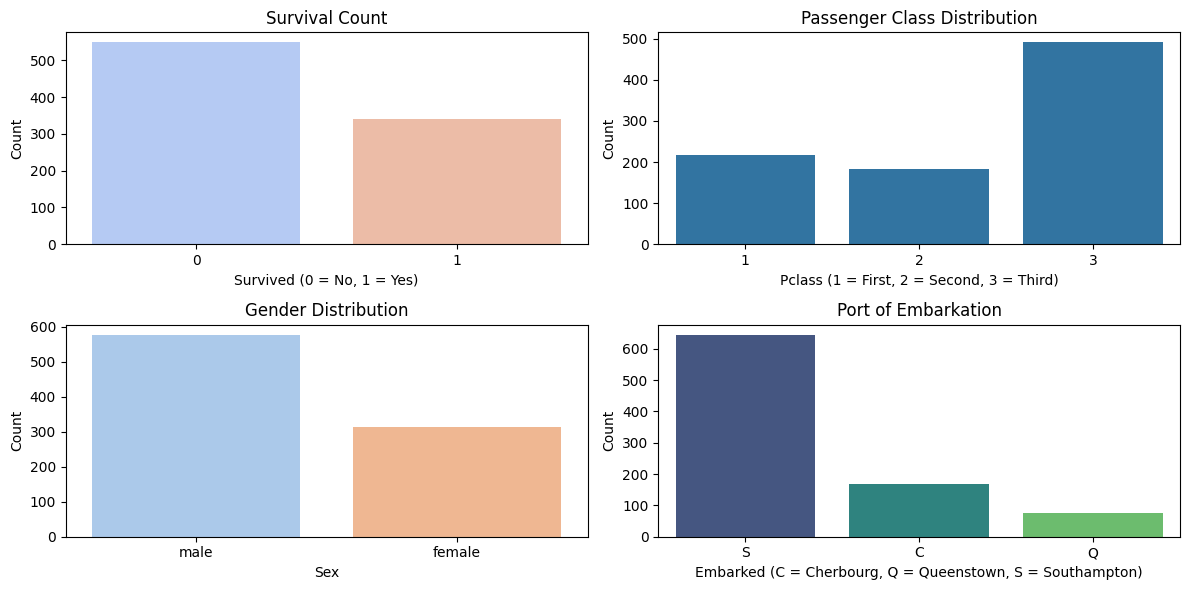

In [115]:
#Barchart of Survived, Pclass, Sex, Embarked
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Bar chart for Survived
plt.subplot(2, 2, 1)
sns.countplot(x="Survived", data=train_df, palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Bar chart for Pclass
plt.subplot(2, 2, 2)
sns.countplot(x="Pclass", data=train_df)
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")

# Bar chart for Sex
plt.subplot(2, 2, 3)
sns.countplot(x="Sex", data=train_df, palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

# Bar chart for Embarked
plt.subplot(2, 2, 4)
sns.countplot(x="Embarked", data=train_df, palette="viridis")
plt.title("Port of Embarkation")
plt.xlabel("Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Count")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


ValueError: `bins` must be positive, when an integer

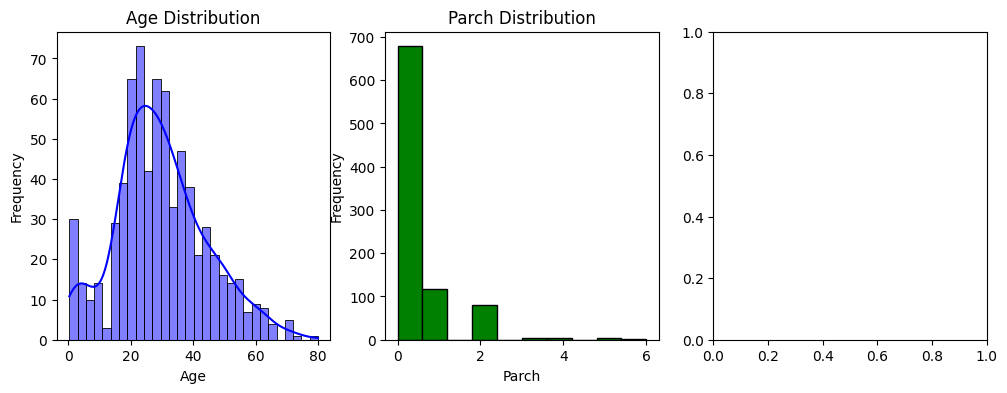

In [116]:
#Histogram of Age, Parch, Fare
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 4))

import seaborn as sns

plt.subplot(1, 3, 1)
sns.histplot(data=train_df, x="Age", bins=30, kde=True, color="blue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")


# Histogram for Parch
plt.subplot(1, 3, 2)
plt.hist(train_df["Parch"], bins=10, color="green", edgecolor="black")
plt.xlabel("Parch")
plt.ylabel("Frequency")
plt.title("Parch Distribution")

# Histogram for Fare
plt.subplot(1, 3, 3)
plt.hist(train_df["Fare"], bins=0, color="red", edgecolor="black")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare Distribution")

# Show plots
plt.tight_layout()
plt.show()


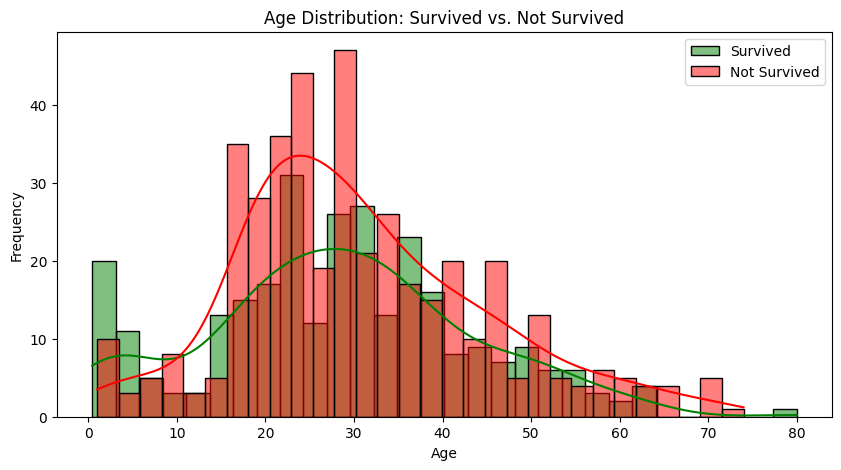

In [ ]:
#Plot histogram of age for survived and did not survived class
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Histogram for Survived (1)
sns.histplot(train_df[train_df["Survived"] == 1]["Age"].dropna(), bins=30, color="green", label="Survived", kde=True)

# Histogram for Not Survived (0)
sns.histplot(train_df[train_df["Survived"] == 0]["Age"].dropna(), bins=30, color="red", label="Not Survived", kde=True)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution: Survived vs. Not Survived")
plt.legend()

# Show plot
plt.show()


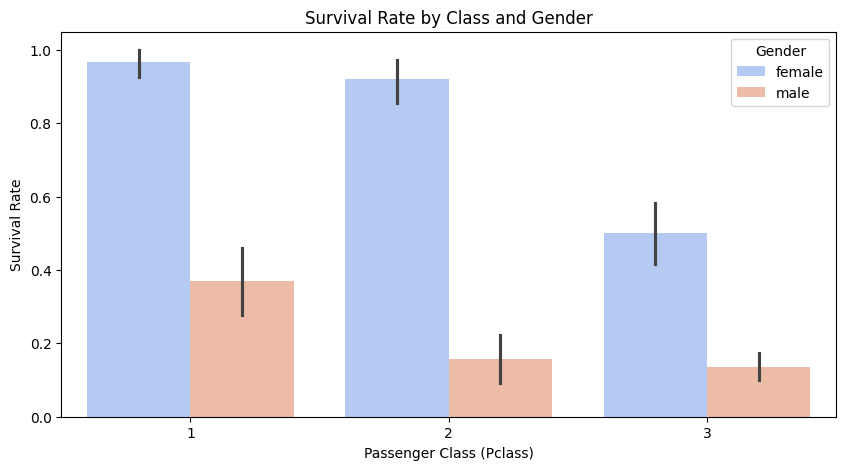

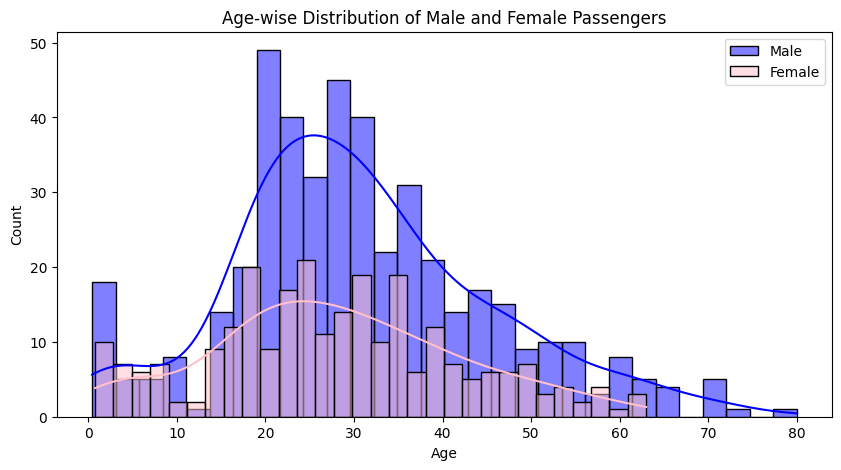

In [ ]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 5))

# Bar plot for class & gender-wise survival rate
sns.barplot(x="Pclass", y="Survived", data=train_df, palette="coolwarm")

# Labels and title
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Class and Gender")
plt.legend(title="Gender")

# Show plot
plt.show()



# Set figure size
plt.figure(figsize=(10, 5))

# Histogram for Male Passengers
sns.histplot(train_df[train_df["Sex"] == "male"]["Age"].dropna(), bins=30, color="blue", label="Male", kde=True)

# Histogram for Female Passengers
sns.histplot(train_df[train_df["Sex"] == "female"]["Age"].dropna(), bins=30, color="pink", label="Female", kde=True)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age-wise Distribution of Male and Female Passengers")
plt.legend()

# Show plot
plt.show()



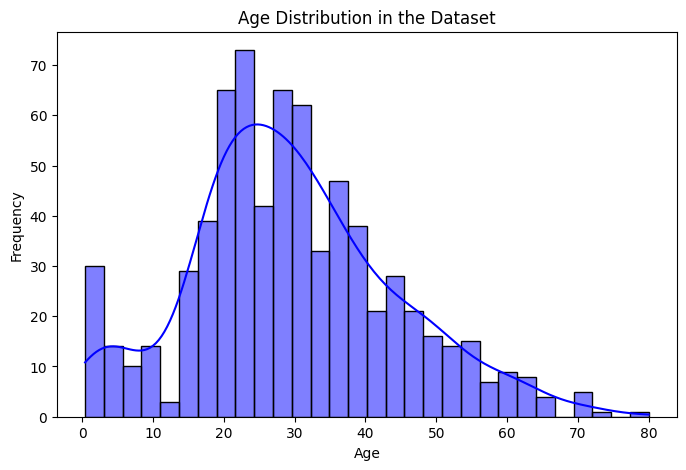

In [ ]:
#Histogram of Age of the given data set(sample)
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Histogram of Age
sns.histplot(train_df["Age"].dropna(), bins=30, color="blue", edgecolor="black", kde=True)

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in the Dataset")

# Show plot
plt.show()


## Handling Missing Values

In [ ]:
#Replace the msiing values in Embarked column by 'S'
# Fill missing values in Embarked with 'S'
train_df["Embarked"].fillna("S", inplace=True)

# Verify if missing values are replaced
print(train_df["Embarked"].isnull().sum())  # Should print 0 if all missing values are filled


0


In [ ]:
#Impute the missing values in Fare column with median value
# Fill missing values in Fare with the median value
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

# Verify if missing values are replaced
print(train_df["Fare"].isnull().sum())  # Should print 0 if all missing values are filled



0


In [ ]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

import numpy as np

# Calculate mean and standard deviation of the Age column (excluding NaN values)
mean_age = train_df["Age"].mean()
std_age = train_df["Age"].std()

# Count missing values in Age
num_missing = train_df["Age"].isnull().sum()

# Generate random ages from a normal distribution
random_ages = np.random.normal(mean_age, std_age, num_missing)

# Fill missing Age values with the generated random values
train_df.loc[train_df["Age"].isnull(), "Age"] = random_ages

# Verify if missing values are replaced
print(train_df["Age"].isnull().sum())  # Should print 0 if all missing values are filled


0


## Feature Engineering - Creating new features

In [ ]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
# Create FamilySize feature
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1  # +1 to include the passenger themselves

# Verify the new column
print(train_df[["SibSp", "Parch", "FamilySize"]].head())


   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [ ]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
# Create IsAlone feature: True if FamilySize == 1, else False
train_df["IsAlone"] = train_df["FamilySize"] == 1

# Convert boolean values to integers (optional)
train_df["IsAlone"] = train_df["IsAlone"].astype(int)

# Verify the new column
print(train_df[["FamilySize", "IsAlone"]].head())


   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [ ]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
# Drop unnecessary columns
train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Verify the remaining columns
print("Remaining columns:", train_df.columns.tolist())


Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']


## Model Building

In [ ]:
#Prepare X and y
# Define the target variable (Survival status)
y = train_df["Survived"]

# Define the feature set (excluding the target variable)
X = train_df.drop("Survived", axis=1)

# Verify the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 9)
y shape: (891,)


In [ ]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["Sex", "Embarked"]

# Apply Label Encoding to categorical columns
label_encoders = {}  # Dictionary to store encoders for future reference
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Verify encoding
print(X.head())



   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone
0       3    1  22.0      1      0   7.2500         2           2        0
1       1    0  38.0      1      0  71.2833         0           2        0
2       3    0  26.0      0      0   7.9250         2           1        1
3       1    0  35.0      1      0  53.1000         2           2        0
4       3    1  35.0      0      0   8.0500         2           1        1


In [ ]:
# concat df_categorical with original df
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["Sex", "Embarked"]

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# X is now ready for training, and no need to concatenate df_categorical
print(X.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone
0       3    1  22.0      1      0   7.2500         2           2        0
1       1    0  38.0      1      0  71.2833         0           2        0
2       3    0  26.0      0      0   7.9250         2           1        1
3       1    0  35.0      1      0  53.1000         2           2        0
4       3    1  35.0      0      0   8.0500         2           1        1


In [ ]:
#Do a pairplot of all features
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of all features
sns.pairplot(train_df, diag_kind="kde", corner=True)

# Show the plot
plt.show()


TypeError: pairplot() got an unexpected keyword argument 'X'

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.00000,1,0,7.2500,2,2,0
1,1,0,38.00000,1,0,71.2833,0,2,0
2,3,0,26.00000,0,0,7.9250,2,1,1
3,1,0,35.00000,1,0,53.1000,2,2,0
4,3,1,35.00000,0,0,8.0500,2,1,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.00000,0,0,13.0000,2,1,1
887,1,0,19.00000,0,0,30.0000,2,1,1
888,3,0,36.61117,1,2,23.4500,2,4,0
889,1,1,26.00000,0,0,30.0000,0,1,1


In [ ]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

# Splitting data (90% train, 10% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Verify the split
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_validation.shape, y_validation.shape)


Training set size: (801, 9) (801,)
Validation set size: (90, 9) (90,)


In [ ]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["Sex", "Embarked"]

# Apply Label Encoding
label_encoders = {}  # Dictionary to store encoders for future use
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Verify if all features are numeric
print(X.dtypes)


Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
FamilySize      int64
IsAlone         int64
dtype: object


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Co

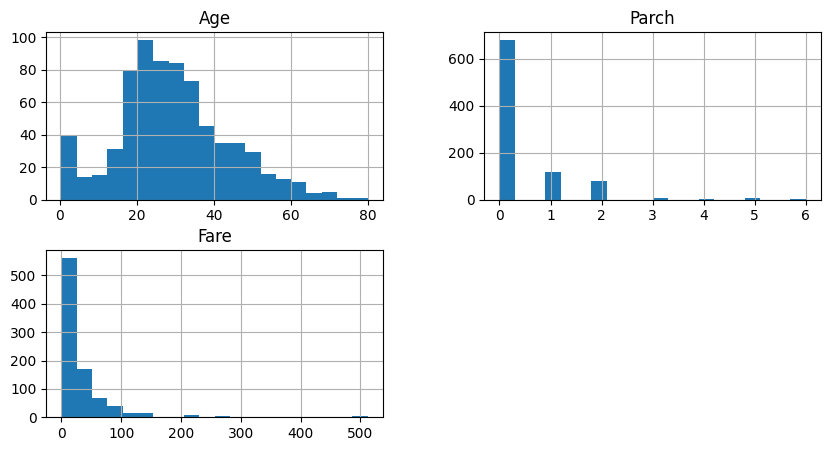

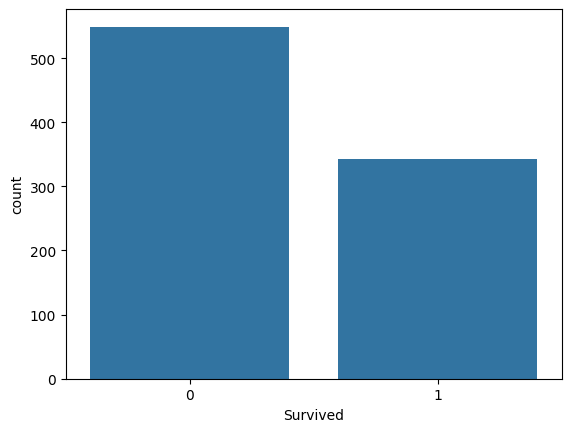

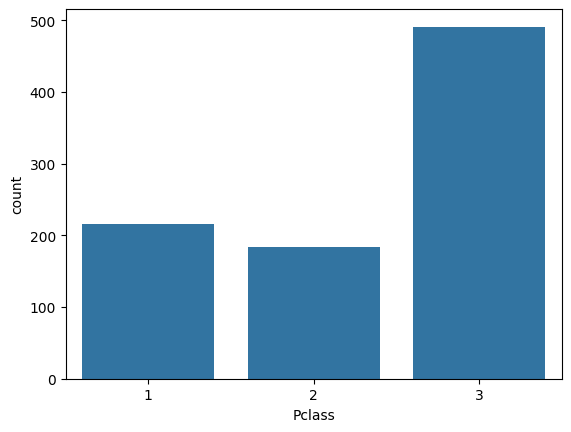

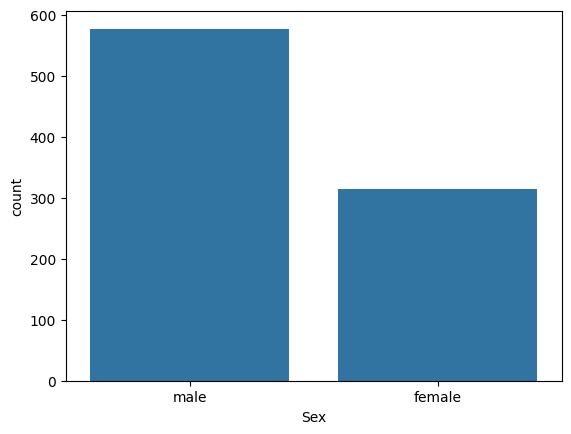

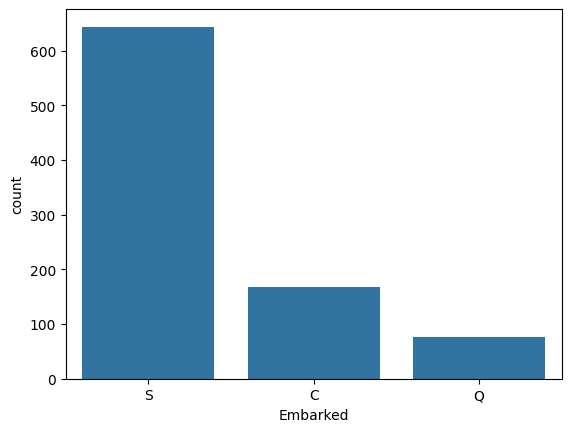

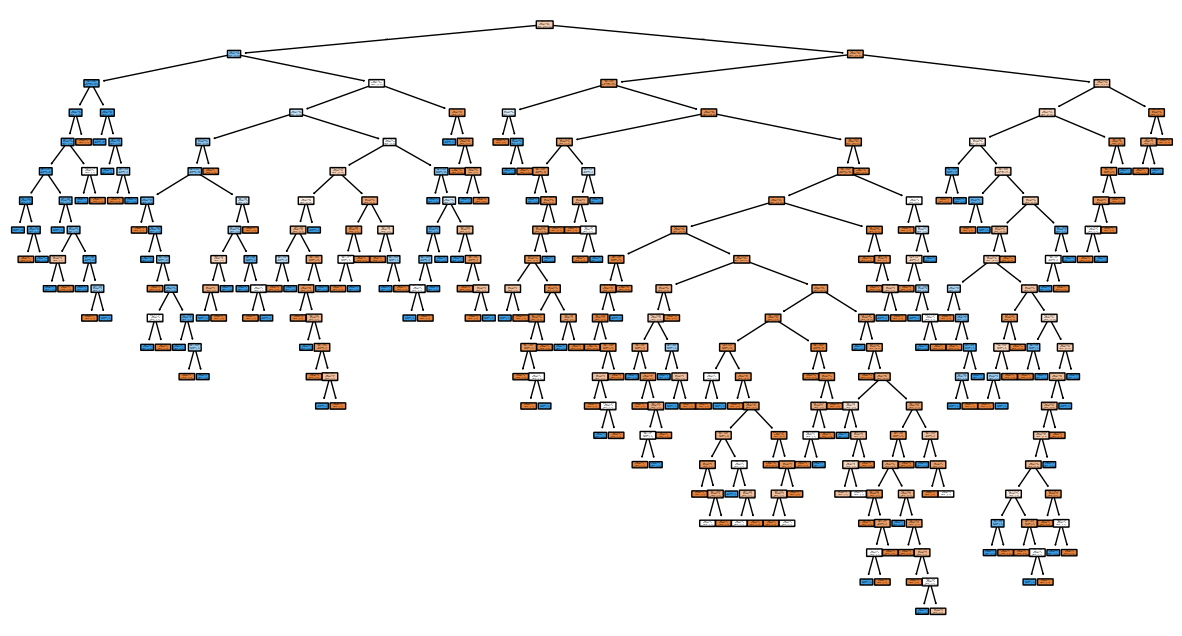

In [ ]:
#Print the tree

# Importing required packages for visualization
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
train_data = pd.read_csv("train.csv")  # Ensure the correct file path

# Display top values
print(train_data.head())

# Print column names
print("Columns:", train_data.columns)

# Print dataset dimensions
print("Train data shape:", train_data.shape)

# Check missing values
print("Missing values:\n", train_data.isnull().sum())

# Visualize histograms for Age, Parch, and Fare
train_data[['Age', 'Parch', 'Fare']].hist(figsize=(10, 5), bins=20)
plt.show()

# Bar charts for categorical features
categorical_cols = ["Survived", "Pclass", "Sex", "Embarked"]
for col in categorical_cols:
    sns.countplot(x=train_data[col])
    plt.show()

# Replace missing values in 'Embarked' with 'S'
train_data["Embarked"].fillna("S", inplace=True)

# Impute missing values in 'Fare' with median
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)

# Impute missing values in 'Age' using random values from normal distribution
age_mean = train_data["Age"].mean()
age_std = train_data["Age"].std()
train_data["Age"] = train_data["Age"].apply(lambda x: np.random.normal(age_mean, age_std) if np.isnan(x) else x)

# Create a new feature 'FamilySize'
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1

# Create new feature 'IsAlone'
train_data["IsAlone"] = (train_data["FamilySize"] == 1).astype(int)

# Drop unnecessary columns
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Prepare X and y
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

# Label encode categorical variables
categorical_cols = ["Sex", "Embarked"]
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split data (90% train, 10% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.show()


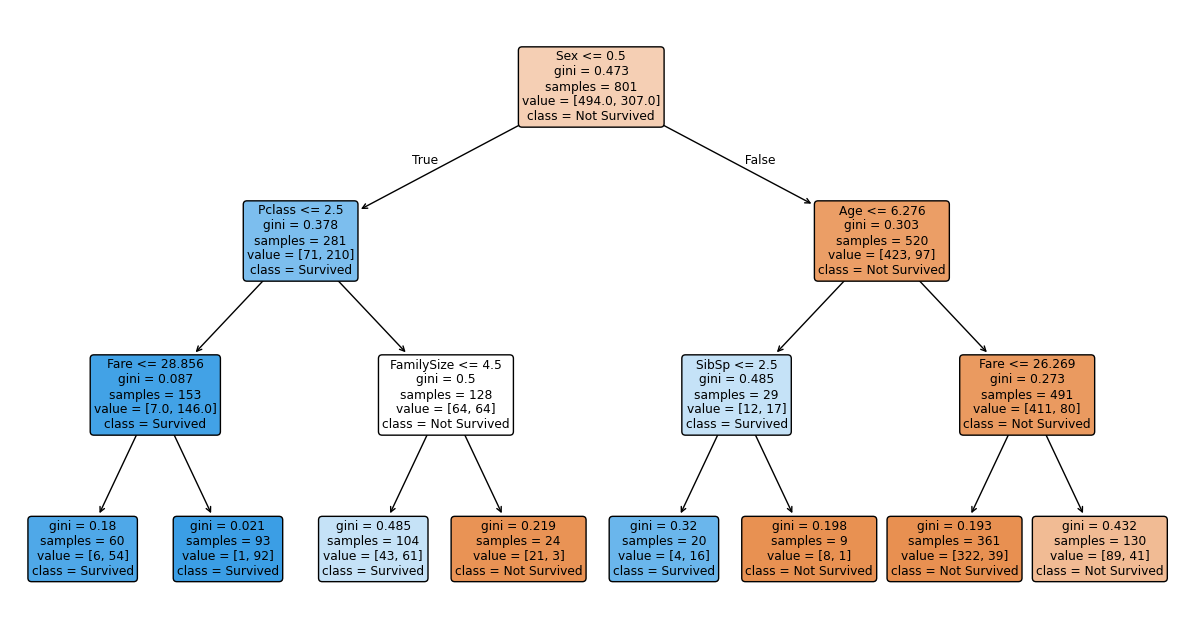

In [ ]:
# plotting tree with max_depth=3
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
train_data = pd.read_csv("train.csv")  # Ensure correct file path

# Replace missing values in 'Embarked' with 'S'
train_data["Embarked"].fillna("S", inplace=True)

# Impute missing values in 'Fare' with median
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)

# Impute missing values in 'Age' using normal distribution
age_mean = train_data["Age"].mean()
age_std = train_data["Age"].std()
train_data["Age"] = train_data["Age"].apply(lambda x: np.random.normal(age_mean, age_std) if np.isnan(x) else x)

# Create new features
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
train_data["IsAlone"] = (train_data["FamilySize"] == 1).astype(int)

# Drop unnecessary columns
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Prepare X and y
X = train_data.drop(columns=["Survived"])
y = train_data["Survived"]

# Label encode categorical variables
categorical_cols = ["Sex", "Embarked"]
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Split data (90% train, 10% validation)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Train Decision Tree model with max_depth=3
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Plot the Decision Tree with max_depth=3
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.show()


<img src="tree2.png">

Accuracy: 0.7889
Precision: 0.7667
Recall: 0.6571
F1 Score: 0.7077

Confusion Matrix:
[[48  7]
 [12 23]]


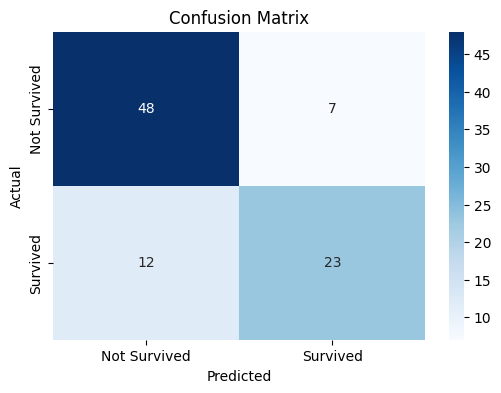


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.77      0.66      0.71        35

    accuracy                           0.79        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.79      0.79      0.79        90



In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions


# Printing classification report
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Compute evaluation metrics
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_validation, y_pred))


Accuracy: 0.7889

Confusion Matrix:
[[48  7]
 [12 23]]


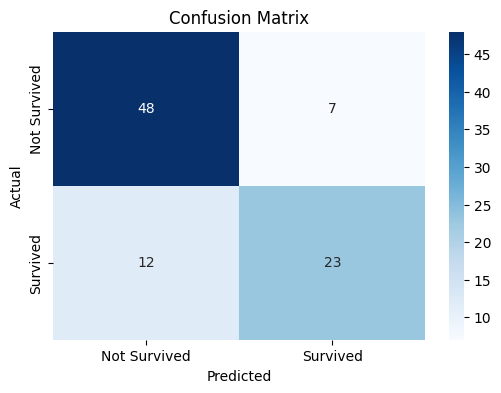

In [ ]:
# Printing confusion matrix and accuracy
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_pred = model.predict(X_validation)

# Compute accuracy
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
